### In Scikit-Learn decision trees are implemented in the:
#### - DecisionTreeRegressor, and
#### - DecisionTreeClassifier classes

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

tree = DecisionTreeClassifier (random_state = 0)
tree.fit(X_train, y_train)

print('Accuracy of training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy of test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy of training set: 1.000
Accuracy of test set: 0.937


In [4]:
# NB: Always split the dataset into 2-3 parts such as training set(60%), test(40%) or even 50:50

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(cancer.target), 2))

0.6
0.2
0.2


In [18]:
print(cancer.DESCR)

#cancer.data

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### To prevent overfitting:
#### - Stopping the creation of the tree early (also called pre-pruning)
#### - Buildingn the tree but then removing or collapsing  nodes that contain little information (also called post-pruning or pruning)

#####  Possible criteria for pre-pruning include
##### - Limiting the maximum depth of the tree,
##### - Limiting the maximum number of leaves, or
##### - Requiring the minimum number of points in a node to keep splitting it

In [5]:
tree = DecisionTreeClassifier (max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print('Accuracy of training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy of test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy of training set: 0.988
Accuracy of test set: 0.921


### We can visualize the trees using export_graphviz function from the tree

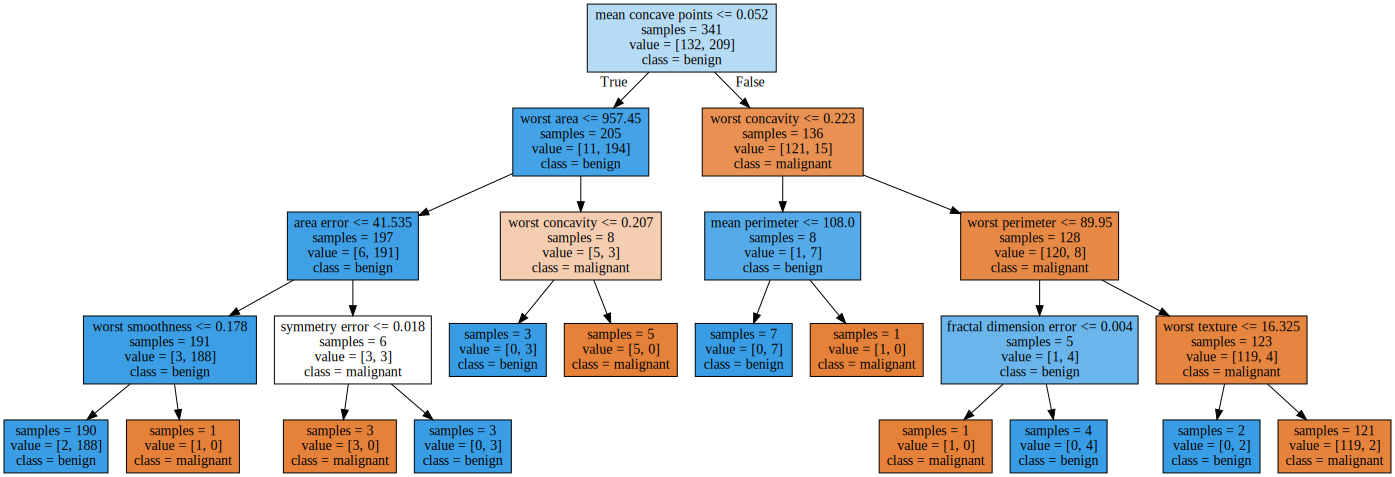

In [13]:
from sklearn.tree import export_graphviz
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))